## 14. 이미지 변형5 (기타)

### 1) 팽창: 이미지를 확장하여 작은 구멍을 채움
 흰색 영역의 외곽 픽셀 주변에 흰색을 추가

In [2]:
import cv2
import numpy as np

kernel = np.ones((3, 3), dtype=np.uint8)
# kernel

img = cv2.imread('dilate.png', cv2.IMREAD_GRAYSCALE)
dilate1 = cv2.dilate(img, kernel, iterations=1) # 반복 횟수
dilate2 = cv2.dilate(img, kernel, iterations=2)
dilate3 = cv2.dilate(img, kernel, iterations=3)

cv2.imshow('gray', img)
cv2.imshow('dilate1', dilate1)
cv2.imshow('dilate2', dilate2)
cv2.imshow('dilate3', dilate3)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2) 침식: 이미지를 깎아서 노이즈 제거
흰색 영역의 외곽 픽셀을 검은색으로 변경

In [3]:
import cv2
import numpy as np
kernel = np.ones((3, 3), dtype=np.uint8)

img = cv2.imread('erode.png', cv2.IMREAD_GRAYSCALE)
erode1 = cv2.erode(img, kernel, iterations=1) # 1회 반복
erode2 = cv2.erode(img, kernel, iterations=2) 
erode3 = cv2.erode(img, kernel, iterations=3) 

cv2.imshow('gray', img)
cv2.imshow('erode1', erode1)
cv2.imshow('erode2', erode2)
cv2.imshow('erode3', erode3)
cv2.waitKey(0)
cv2.destroyAllWindows()

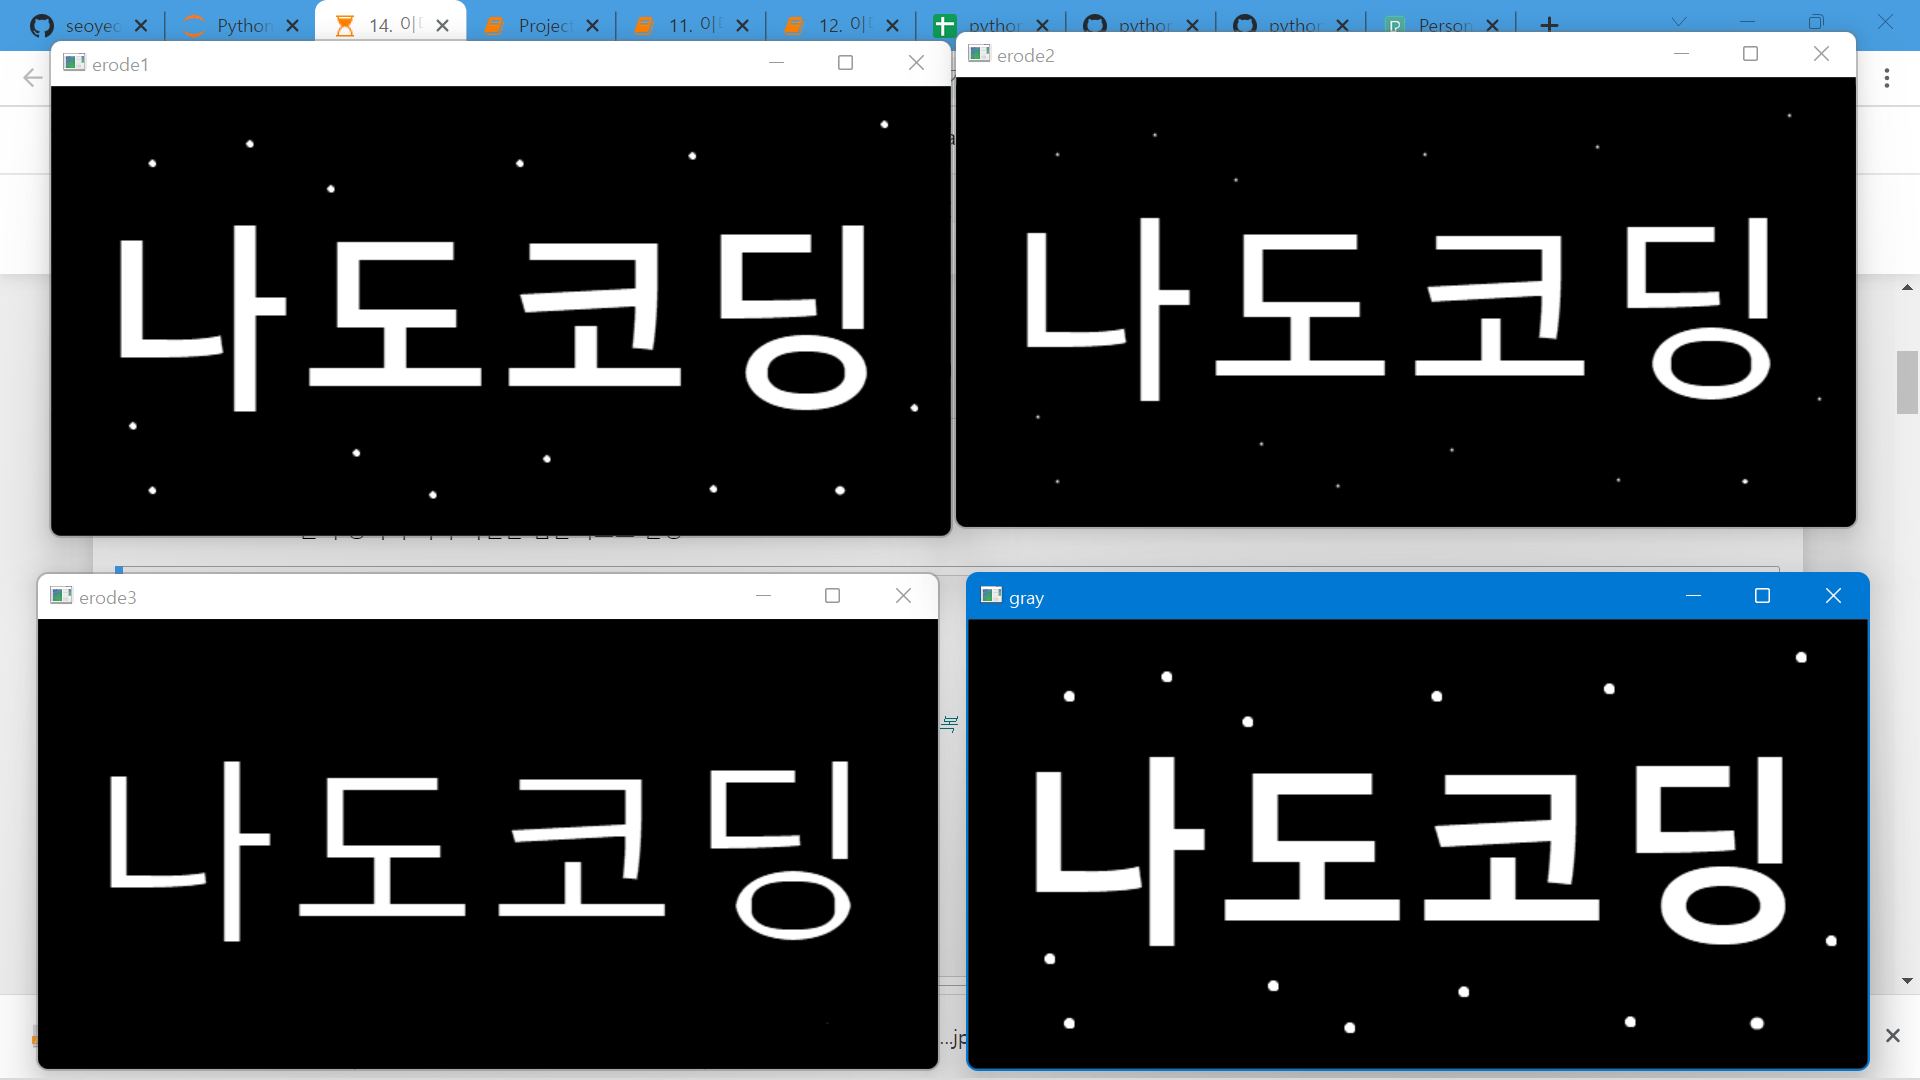

### 3-1) 열림 (Opening) : 침식 후 팽창. 깎아서 노이즈 제거 후 살 찌움
> dilate(erode(image))

In [4]:
import cv2
import numpy as np
kernel = np.ones((3, 3), dtype=np.uint8)

img = cv2.imread('erode.png', cv2.IMREAD_GRAYSCALE)

erode = cv2.erode(img, kernel, iterations=3)
dilate = cv2.dilate(erode, kernel, iterations=3)

cv2.imshow('img', img)
cv2.imshow('erode', erode)
cv2.imshow('dilate', dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

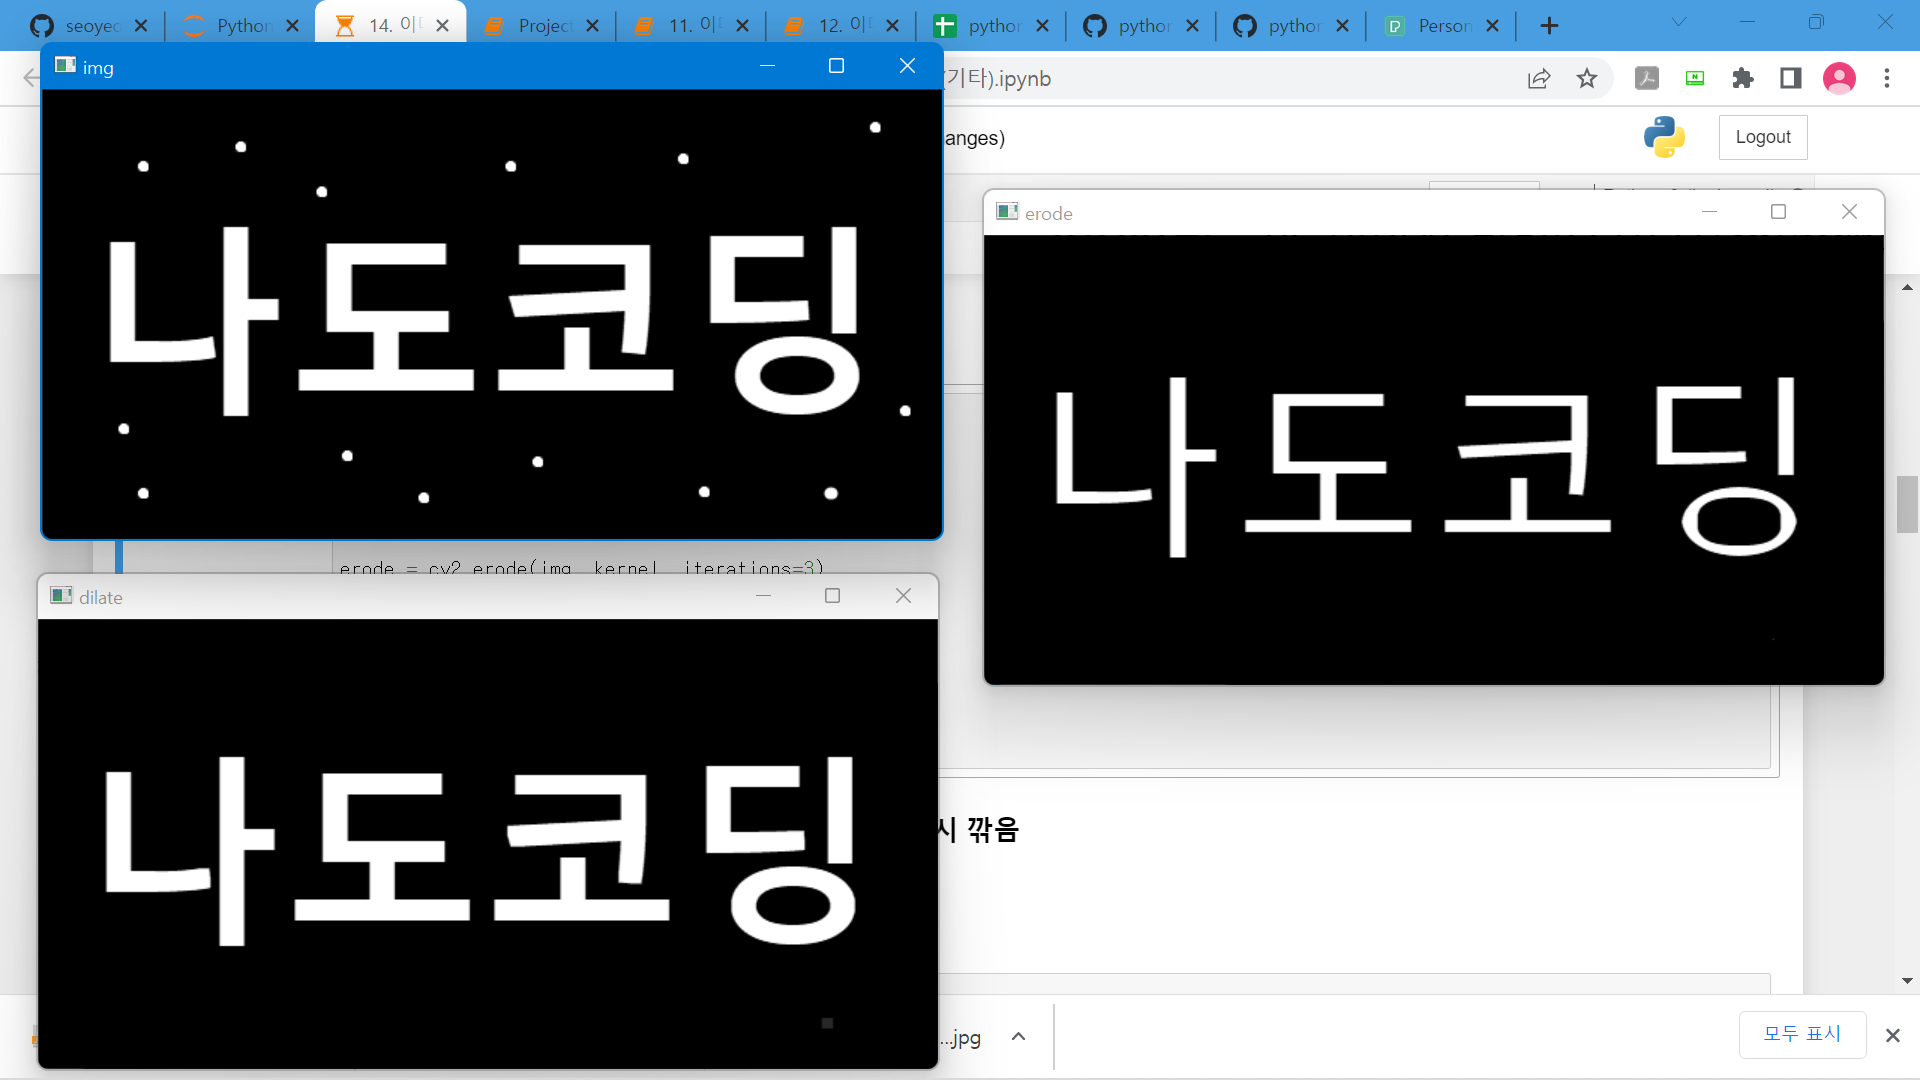

### 3-2) 닫힘 (Closing) : 팽창 후 침식. 구멍을 메운 후 다시 깎음
> erode(dilate(image))

In [5]:
import cv2
import numpy as np
kernel = np.ones((3, 3), dtype=np.uint8)

img = cv2.imread('dilate.png', cv2.IMREAD_GRAYSCALE)

dilate = cv2.dilate(img, kernel, iterations=3)
erode = cv2.erode(dilate, kernel, iterations=3)

cv2.imshow('img', img)
cv2.imshow('dilate', dilate)
cv2.imshow('erode', erode)
cv2.waitKey(0)
cv2.destroyAllWindows()

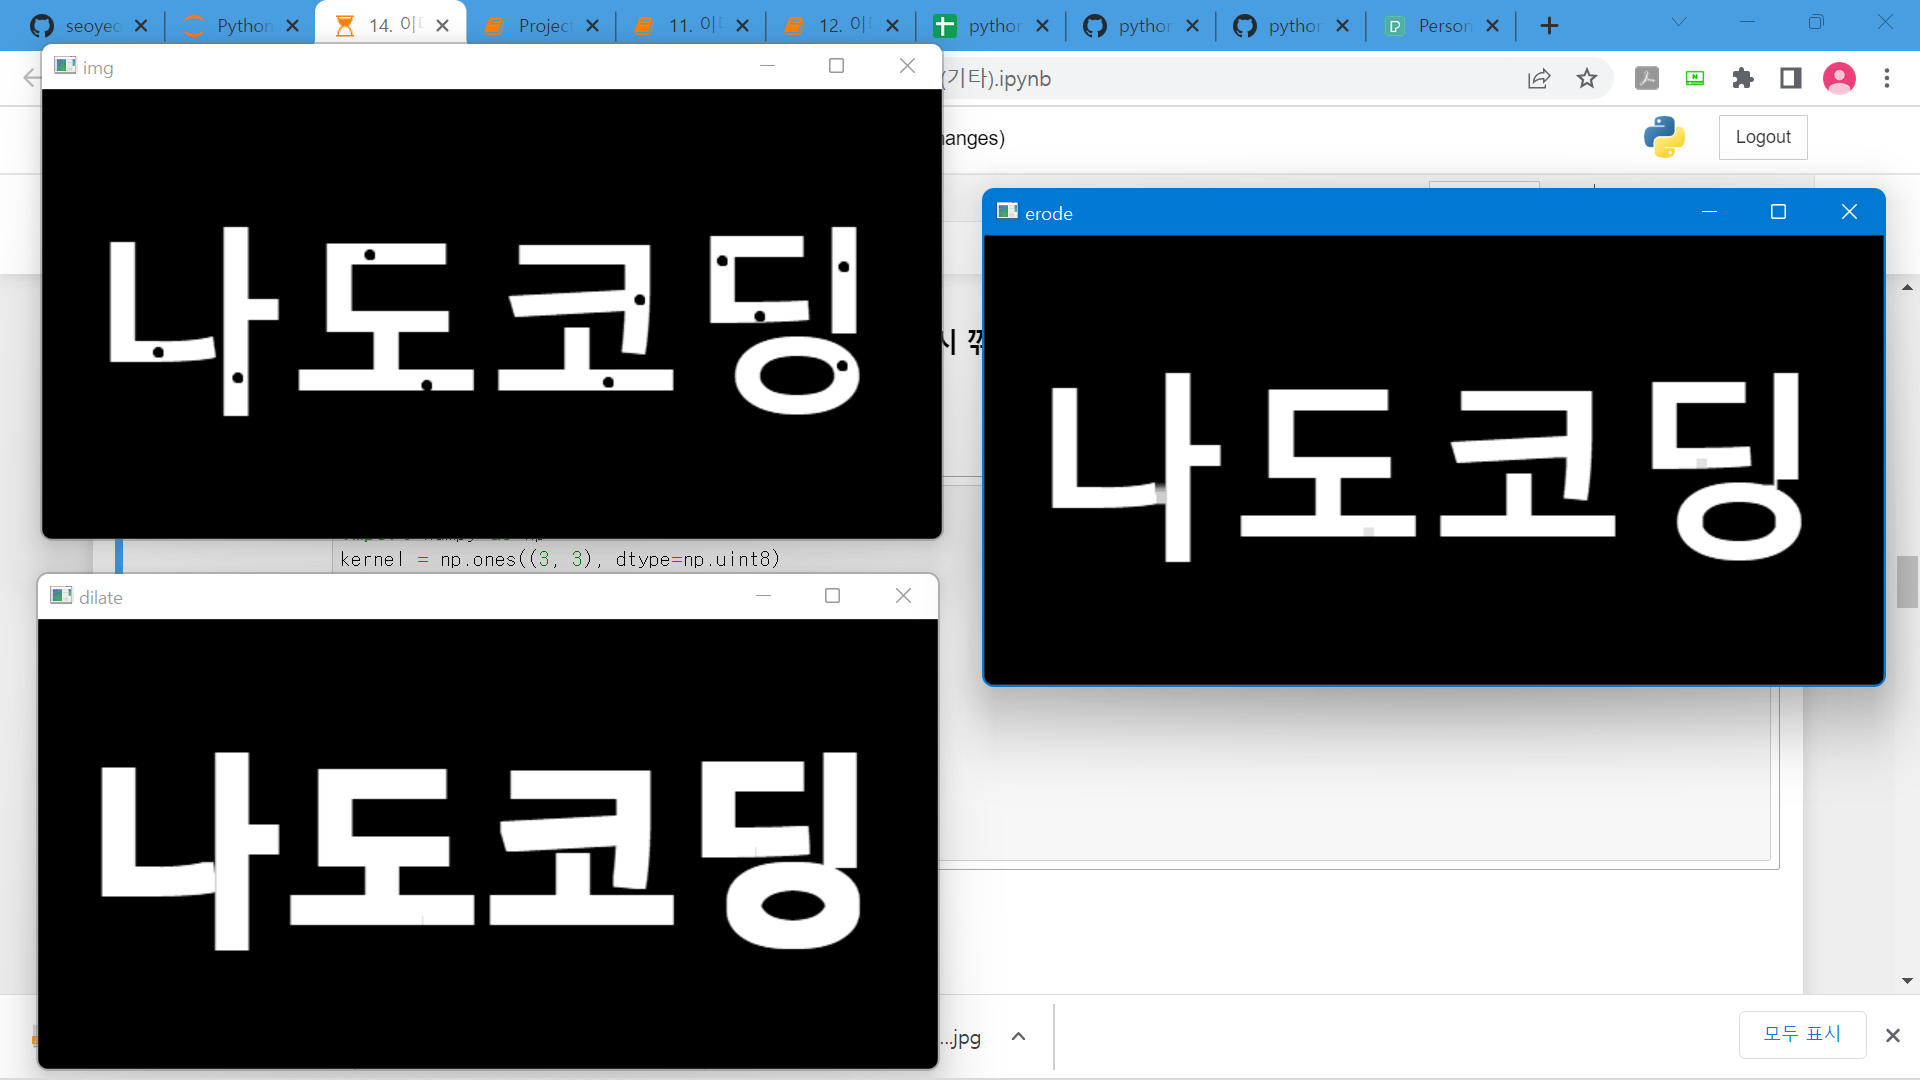

### 4) Edge-Detector
Canny Edge Detection

In [7]:
import cv2
img = cv2.imread('snowman.png')

canny = cv2.Canny(img, 150, 200)
# 대상 이미지, minVal (하위임계값), maxVal (상위임계값)

cv2.imshow('img', img)
cv2.imshow('canny', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

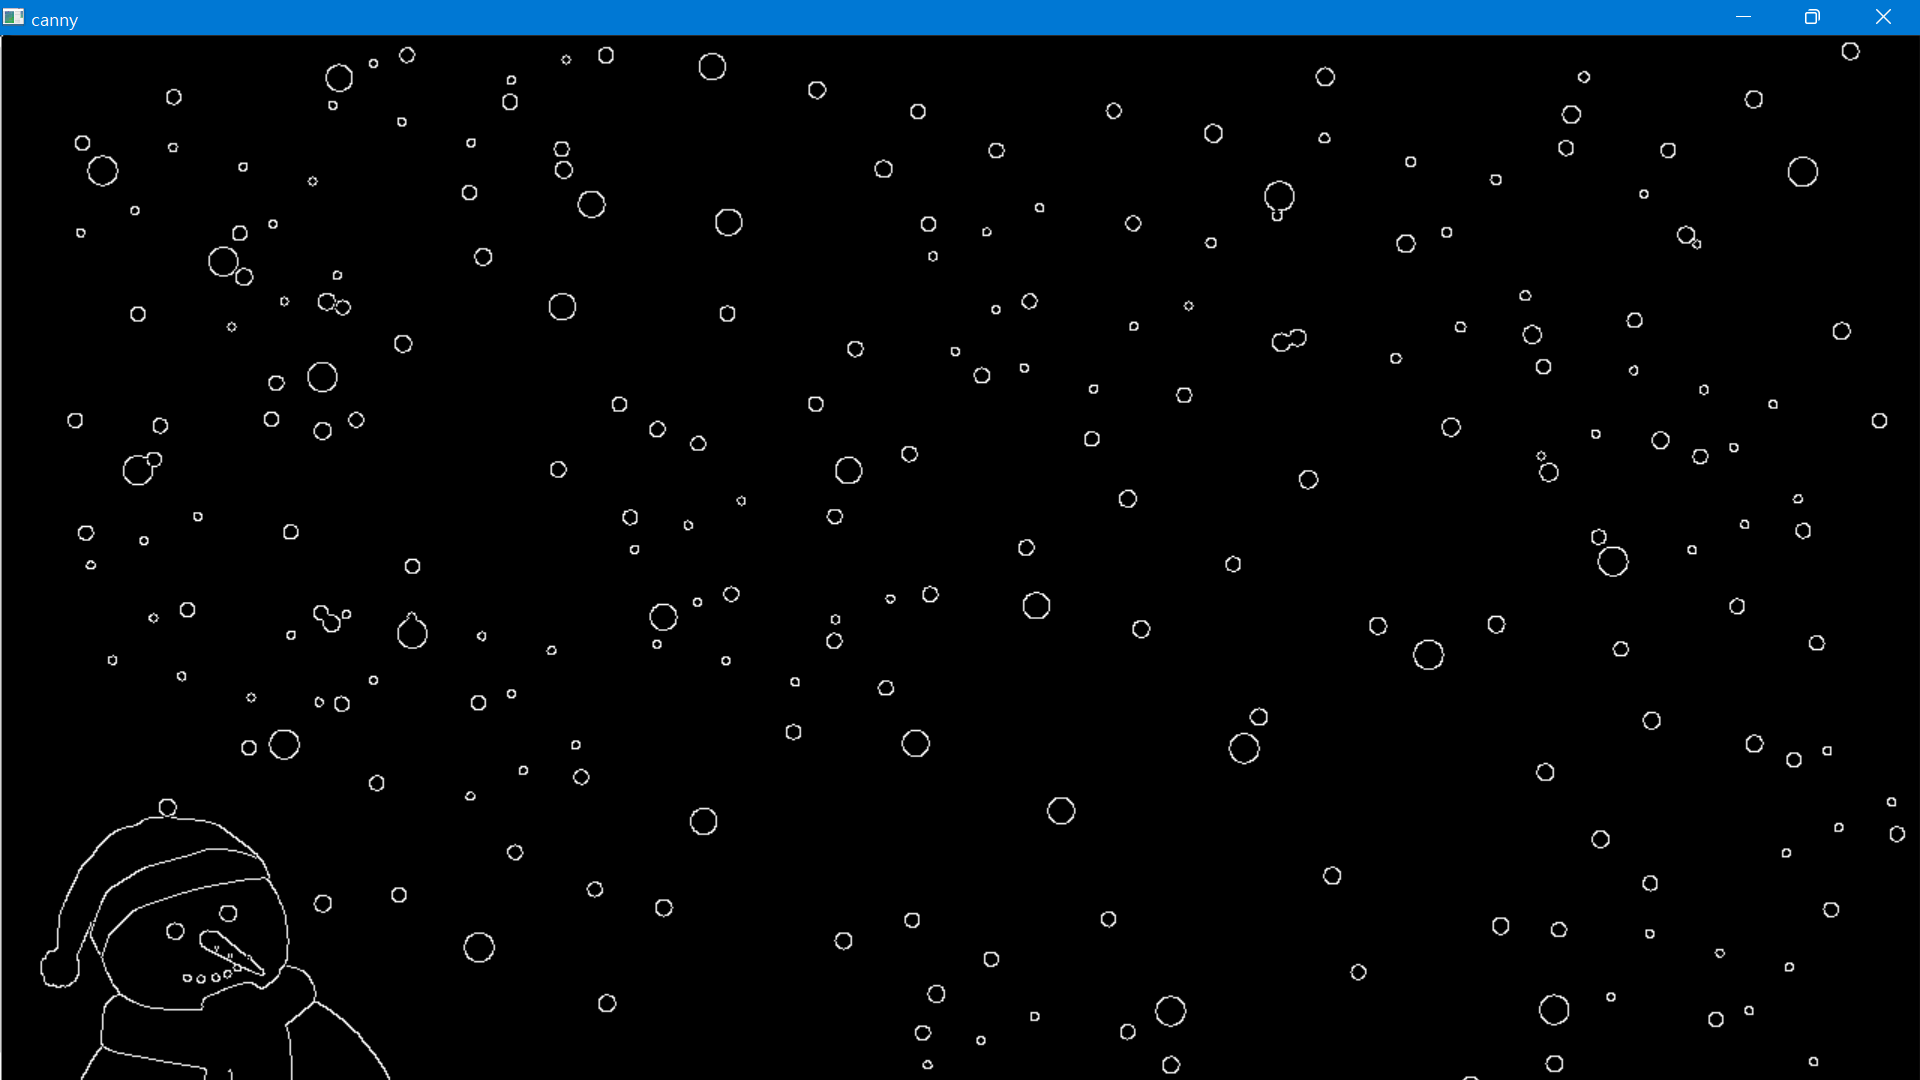

In [8]:
import cv2

def empty(pos):
    pass

img = cv2.imread('snowman.png')

name = "Trackbar"
cv2.namedWindow(name)
cv2.createTrackbar('threshold1', name, 0, 255, empty) # minVal
cv2.createTrackbar('threshold2', name, 0, 255, empty) # maxVal

while True:
    threshold1 = cv2.getTrackbarPos('threshold1', name)
    threshold2 = cv2.getTrackbarPos('threshold2', name)
    
    canny = cv2.Canny(img, threshold1, threshold2)
    # 대상 이미지, minVal (하위임계값), maxVal (상위임계값)
    
    cv2.imshow('img', img)
    cv2.imshow(name, canny)
    
    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()

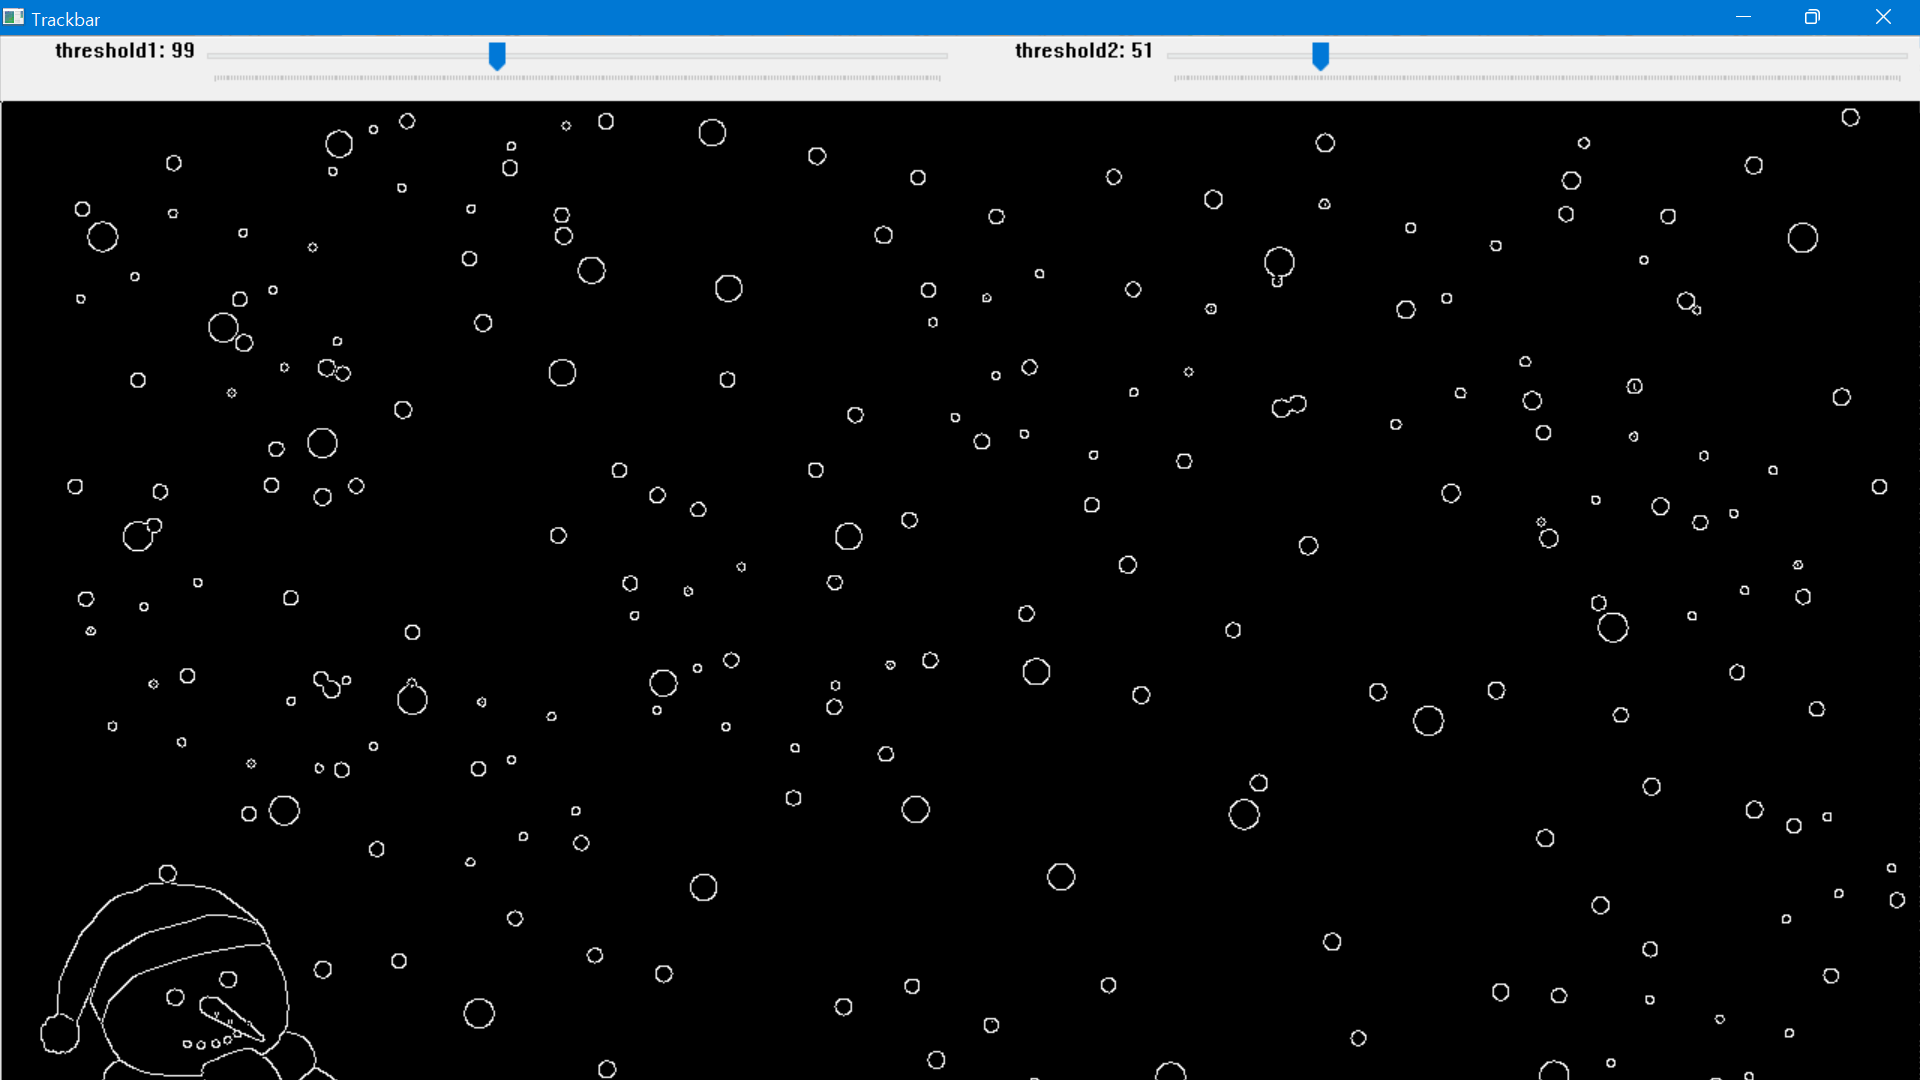

### 5) Contour : 경계선을 연결한 선

In [9]:
import cv2
img = cv2.imread('card.png')
target_img = img.copy() # 사본 이미지

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) # 윤곽선 검출
# 윤곽선 정보, 계층 구조
# 이미지, 윤곽선 찾는 모드 (mode), 윤곽선 찾을때 사용하는 근사치 방법 (method) : CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE

COLOR = (0, 200, 0) # 녹색
cv2.drawContours(target_img, contours, -1, COLOR, 2) # 윤곽선 그리기
# 대상 이미지, 윤곽선 정보, 인덱스 (-1 이면 전체), 색깔, 두께

cv2.imshow('img', img)
cv2.imshow('gray', gray)
cv2.imshow('otsu', otsu)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

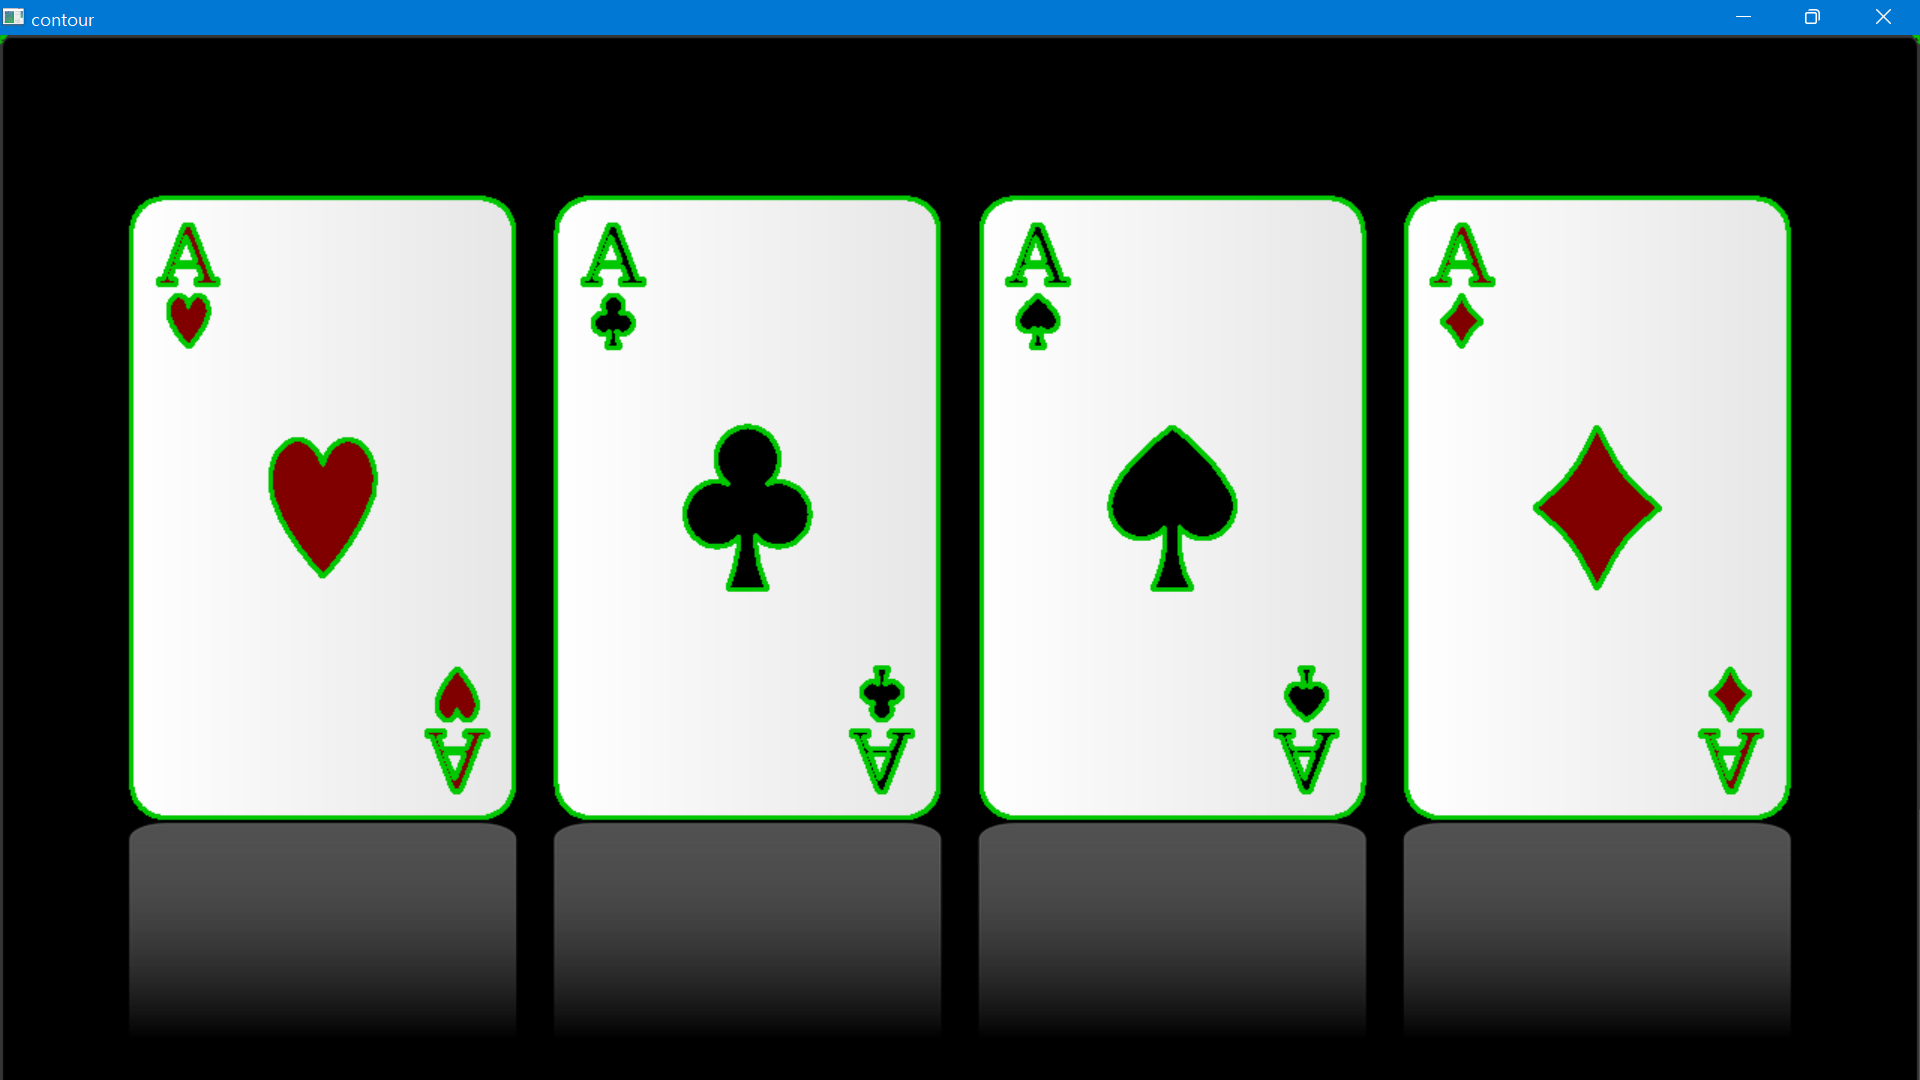

#### 윤곽선 찾기 모드
1. cv2.RETR_EXTERNAL : 가장 외곽의 윤곽선만 찾음
1. cv2.RETR_LIST : 모든 윤곽선 찾음 (계층 정보 없음)
1. cv2.RETR_TREE : 모든 윤곽선 찾음 (계층 정보를 트리 구조로 생성)

In [10]:
import cv2
img = cv2.imread('card.png')
target_img = img.copy() # 사본 이미지

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours, hierarchy = cv2.findContours(otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# print(hierarchy)
# print(f'총 발견 갯수 : {len(contours)}')

COLOR = (0, 200, 0) # 녹색
cv2.drawContours(target_img, contours, -1, COLOR, 2)

cv2.imshow('img', img)
cv2.imshow('gray', gray)
cv2.imshow('otsu', otsu)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### 경계 사각형
윤곽선의 경계면을 둘러싸는 사각형
> boundingRect()

In [11]:
import cv2
img = cv2.imread('card.png')
target_img = img.copy() # 사본 이미지

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

COLOR = (0, 200, 0) # 녹색

for cnt in contours:
    x, y, width, height = cv2.boundingRect(cnt)
    cv2.rectangle(target_img, (x, y), (x + width, y + height), COLOR, 2) # 사각형 그림

cv2.imshow('img', img)
cv2.imshow('gray', gray)
cv2.imshow('otsu', otsu)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

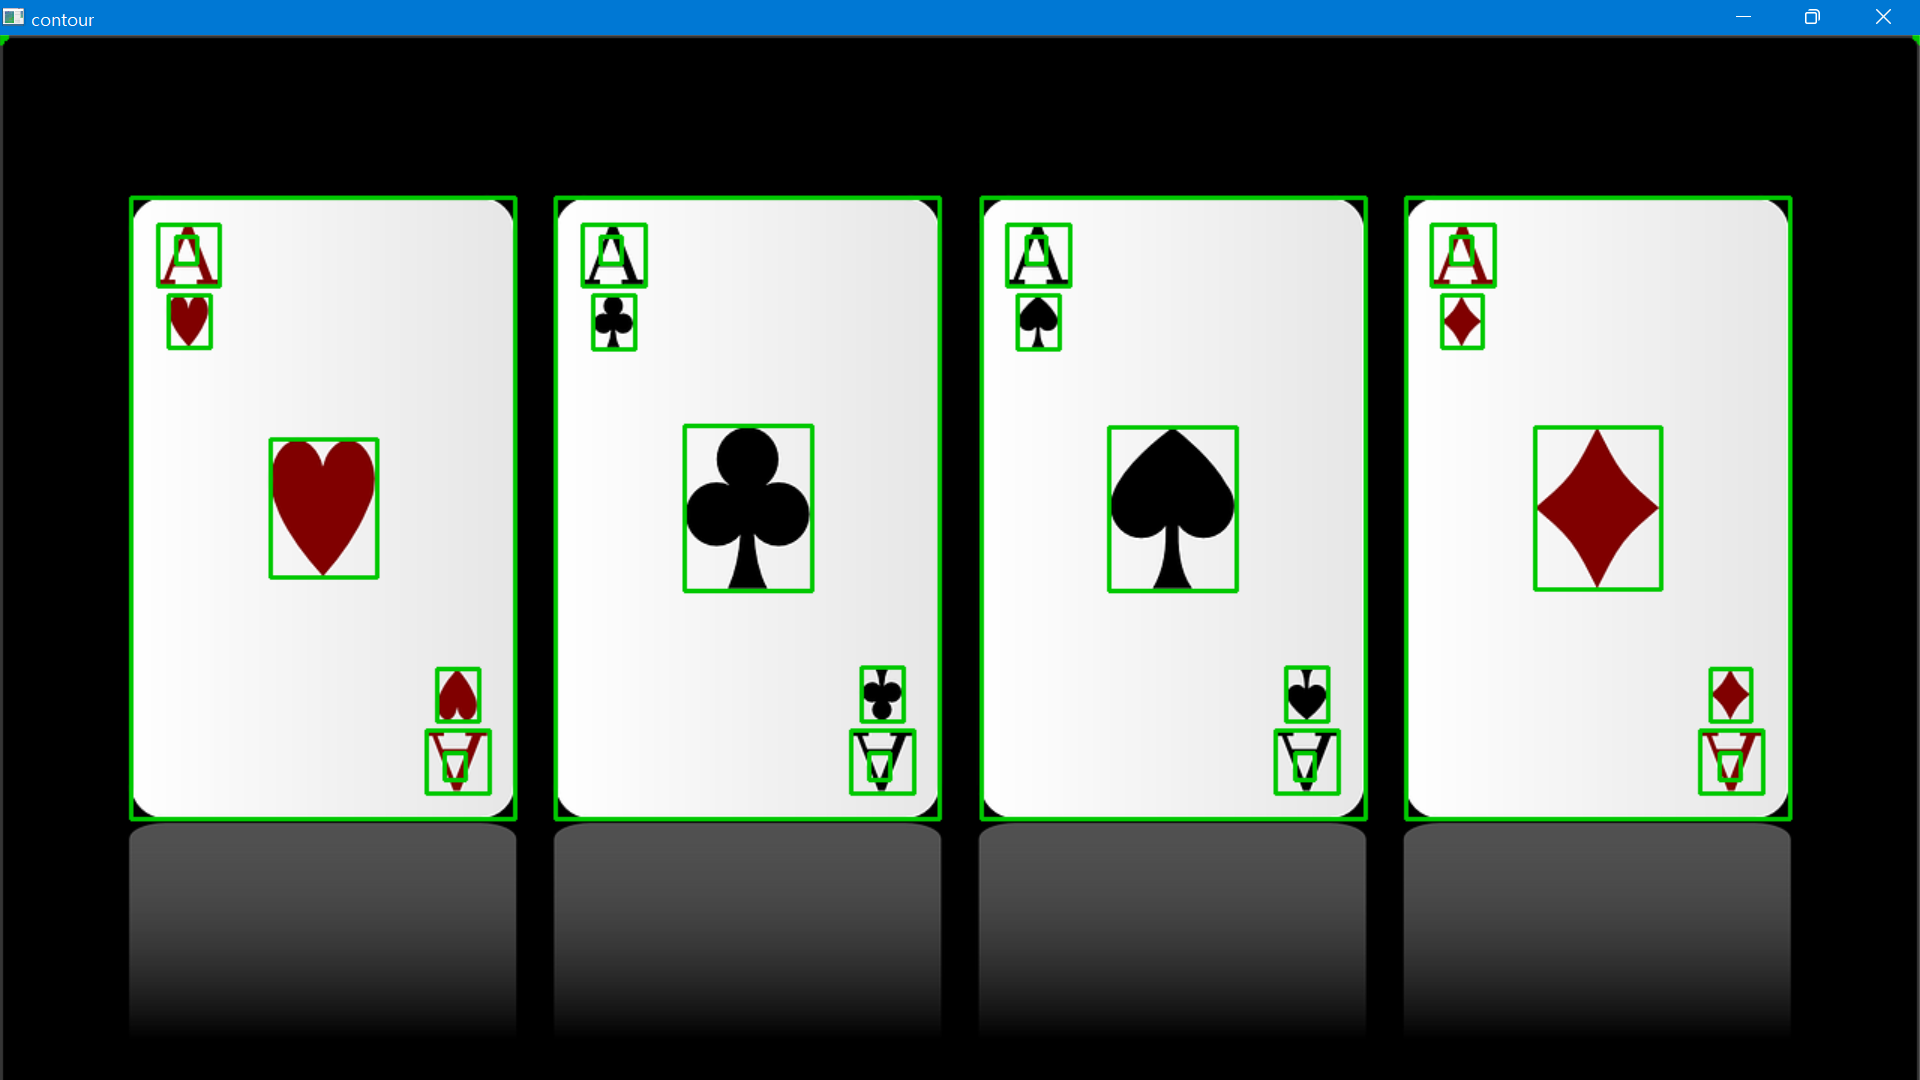

#### 면적
> contourArea()

In [12]:
import cv2
img = cv2.imread('card.png')
target_img = img.copy() # 사본 이미지

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

COLOR = (0, 200, 0) # 녹색

for cnt in contours:
    if cv2.contourArea(cnt) > 25000:
        x, y, width, height = cv2.boundingRect(cnt)
        cv2.rectangle(target_img, (x, y), (x + width, y + height), COLOR, 2) # 사각형 그림

cv2.imshow('img', img)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

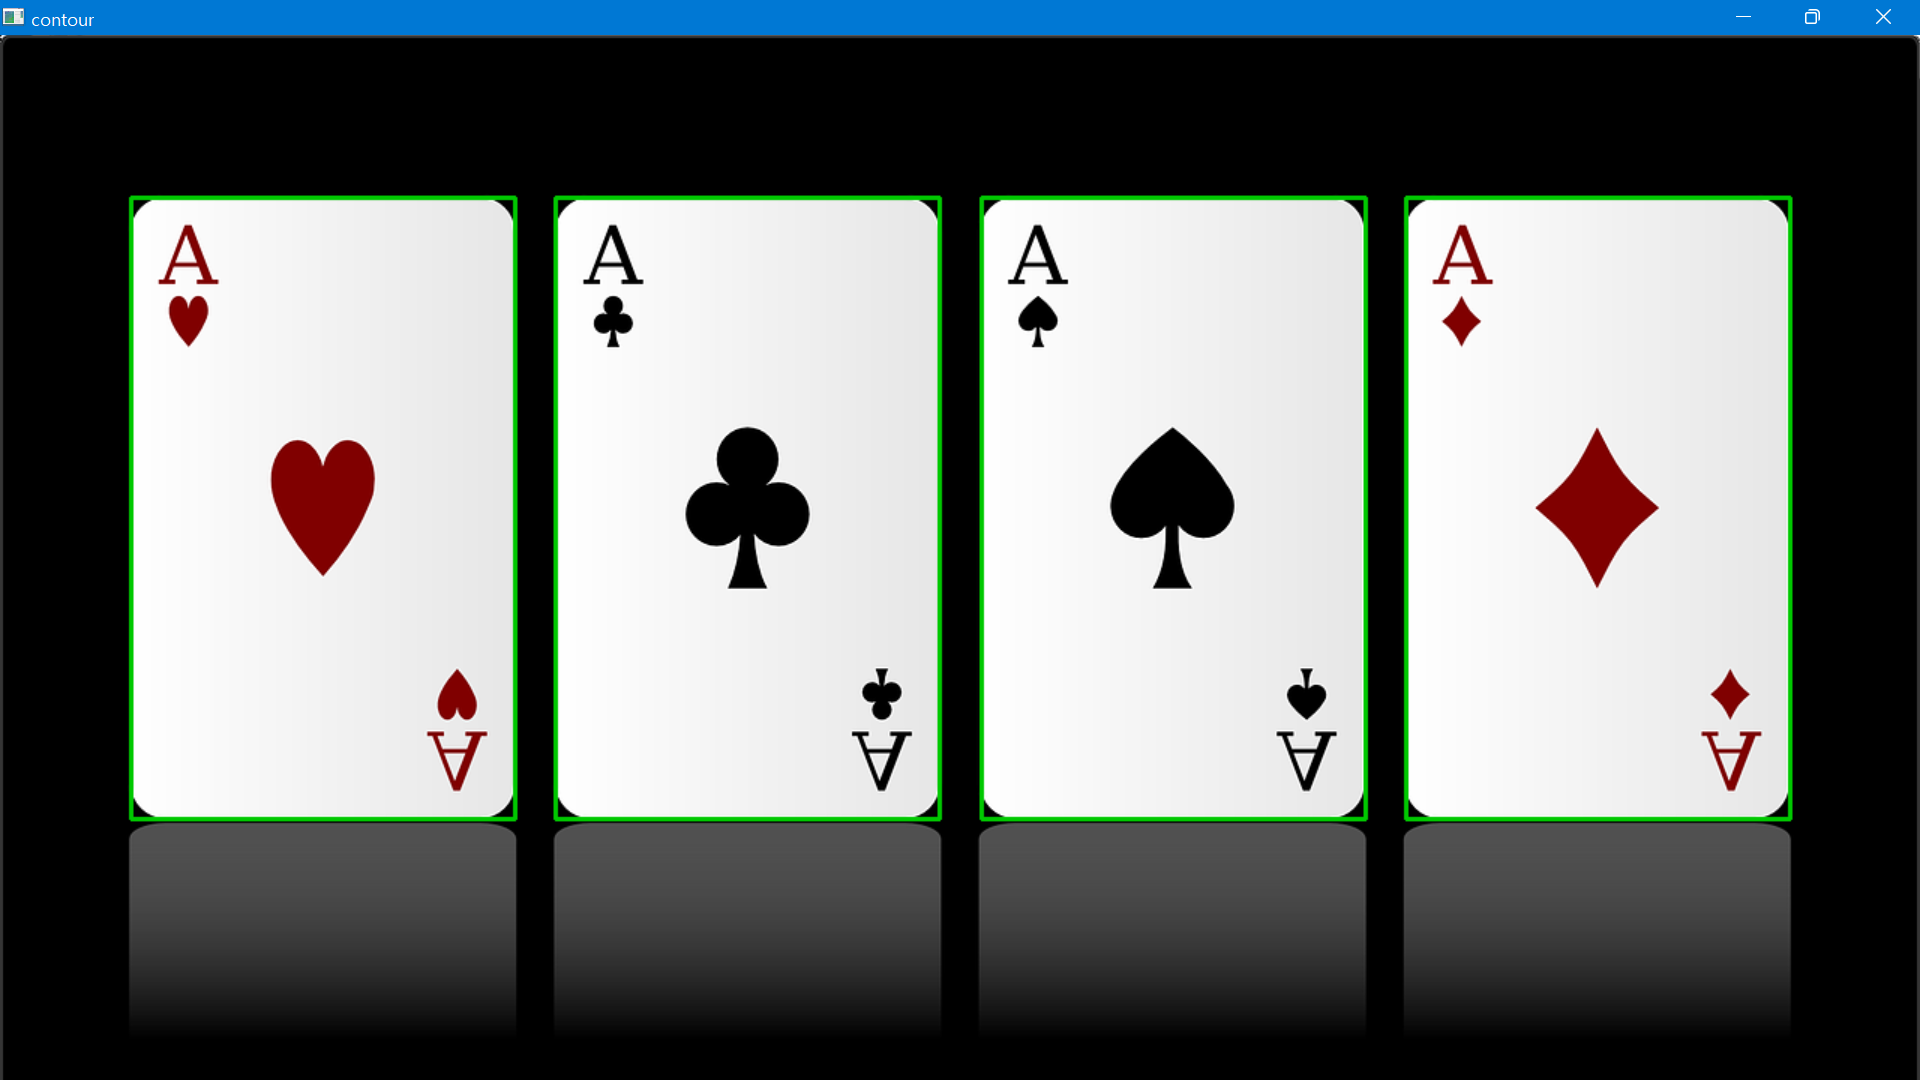

#### 미니 프로젝트 : 개별 카드 추출해서 파일 저장

In [13]:
import cv2
img = cv2.imread('card.png')
target_img = img.copy() # 사본 이미지

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

COLOR = (0, 200, 0) # 녹색

idx = 1
for cnt in contours:
    if cv2.contourArea(cnt) > 25000:
        x, y, width, height = cv2.boundingRect(cnt)
        cv2.rectangle(target_img, (x, y), (x + width, y + height), COLOR, 2) # 사각형 그림
        
        crop = img[y:y+height, x:x+width]
        cv2.imshow(f'card_crop_{idx}', crop)
        cv2.imwrite(f'card_crop_{idx}.png', crop) # 파일 저장
        idx += 1

cv2.imshow('img', img)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()